In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

In [2]:
from vae import VAE

## model building

In [3]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [4]:
z_dim = 10

In [5]:
vae = VAE(device_name=device, learning_rate=1e-3, z_dim=z_dim)

In [6]:
# if you already have pretrained model
# vae.load(global_step="latest")

## dataset preprare

In [6]:
from tensorflow.python.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_val = X_test.astype('float32') / 255.
X_val = X_val.reshape((X_val.shape[0], 28 * 28))

In [8]:
vae(tf.convert_to_tensor(X_train[:1]))
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  401920    
_________________________________________________________________
dense_2 (Dense)              multiple                  196992    
_________________________________________________________________
dense_3 (Dense)              multiple                  98560     
_________________________________________________________________
dense_4 (Dense)              multiple                  2570      
_________________________________________________________________
dense_5 (Dense)              multiple                  2570      
_________________________________________________________________
dense_6 (Dense)              multiple                  2816      
_________________________________________________________________
dense_7 (Dense)              multiple                  98688     
__________

## test functions

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# basic comparison for test dataset
def origtest():
    testset = X_test[:10,:,:]      
    img_orig = testset.reshape(-1,28,28)
    img_orig = np.concatenate(img_orig, axis=1)
       
    input_test = testset.astype('float32')/255.
    input_test = input_test.reshape(-1, 28*28)
    input_test = tf.convert_to_tensor(input_test)
    
    z_mu, z_logsigma  = vae.encoding(input_test)
    z = vae.sampling_z(z_mu, z_logsigma)
    x_decode = tf.nn.sigmoid(vae.decoding(z))
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
    plt.imshow(img_orig)
    plt.show()
    plt.imshow(img_test)
    plt.show()

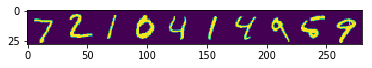

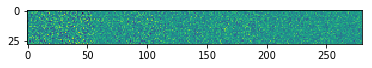

In [11]:
origtest()

In [12]:
# random latent variable test
def randomtest():
    z = tf.random_normal((10, z_dim))
    x_decode = tf.nn.sigmoid(vae.decoding(z))
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
    plt.imshow(img_test)
    plt.show()

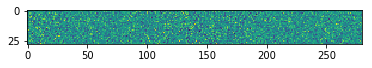

In [13]:
randomtest()

In [14]:
# use mean latent variable in test dataset, reconstruct specific number
def noisetest(num):
    num_sample = np.array([X_test[i] for i in range(len(X_test)) if y_test[i] == num])/255.  
    num_sample = num_sample.reshape(-1,28*28)
    input_sample = tf.convert_to_tensor(num_sample)
    mu, logsigma = vae.encoding(num_sample)

    z = vae.sampling_z(mu, logsigma)
    z = tf.reduce_mean(z, axis=0)
    z = tf.reshape(z, (1,z_dim))
    
    x_decode = tf.nn.sigmoid(vae.decoding(z))
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
    
    plt.imshow(img_test)
    plt.show()

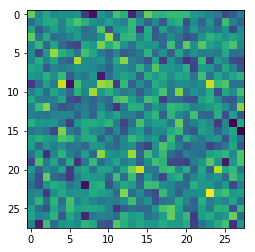

In [15]:
noisetest(8)

[EPOCH 1 / STEP 1] TRAIN
TRAIN loss   : 134.4265
RECON loss   : 119.0276
KL    loss   : 15.3990
[EPOCH 1 / STEP 1] VAL  
VAL   loss   : 117.2727
RECON loss   : 100.7425
KL    loss   : 16.5302
orig   test


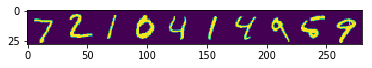

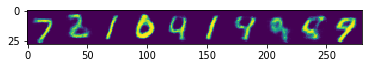

random test


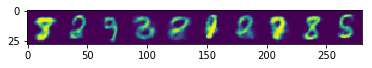

noise  test(number 8)


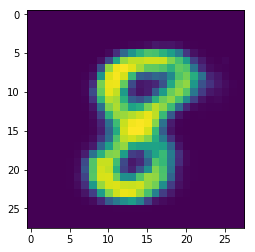

[EPOCH 1 / STEP 2] TRAIN
TRAIN loss   : 116.2299
RECON loss   : 99.0164
KL    loss   : 17.2135
[EPOCH 1 / STEP 2] VAL  
VAL   loss   : 113.2933
RECON loss   : 95.4621
KL    loss   : 17.8312
orig   test


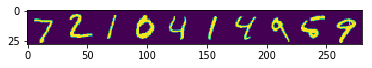

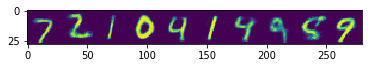

random test


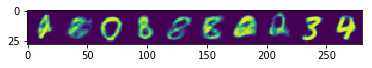

noise  test(number 8)


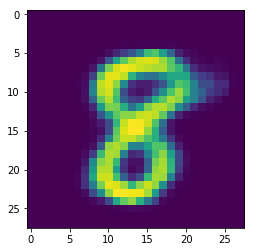

[EPOCH 1 / STEP 3] TRAIN
TRAIN loss   : 112.5955
RECON loss   : 94.9803
KL    loss   : 17.6152
[EPOCH 1 / STEP 3] VAL  
VAL   loss   : 109.6144
RECON loss   : 91.0868
KL    loss   : 18.5277
orig   test


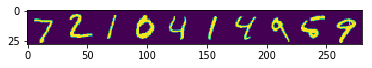

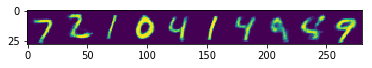

random test


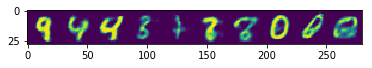

noise  test(number 8)


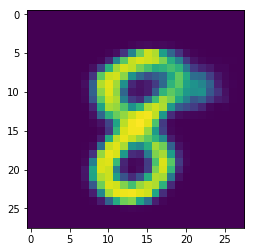

[EPOCH 1 / STEP 4] TRAIN
TRAIN loss   : 110.3440
RECON loss   : 92.5041
KL    loss   : 17.8398
[EPOCH 1 / STEP 4] VAL  
VAL   loss   : 108.4406
RECON loss   : 90.2680
KL    loss   : 18.1726
orig   test


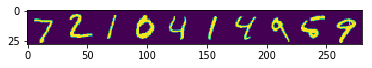

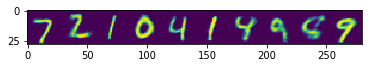

random test


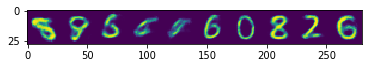

noise  test(number 8)


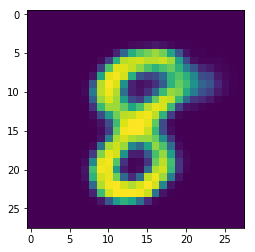

[EPOCH 1 / STEP 5] TRAIN
TRAIN loss   : 108.9599
RECON loss   : 90.9467
KL    loss   : 18.0131
[EPOCH 1 / STEP 5] VAL  
VAL   loss   : 106.9933
RECON loss   : 89.0102
KL    loss   : 17.9831
orig   test


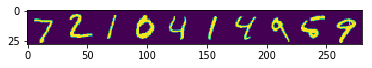

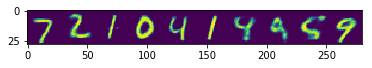

random test


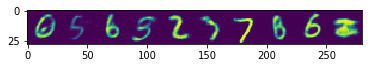

noise  test(number 8)


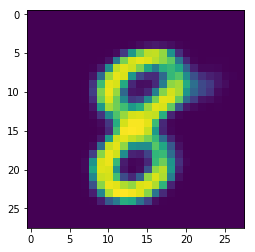

[EPOCH 1 / STEP 6] TRAIN
TRAIN loss   : 107.9538
RECON loss   : 89.8008
KL    loss   : 18.1531
[EPOCH 1 / STEP 6] VAL  
VAL   loss   : 107.3951
RECON loss   : 89.3926
KL    loss   : 18.0024
orig   test


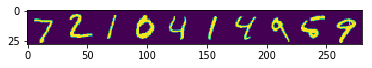

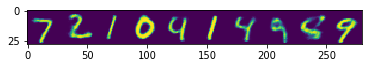

random test


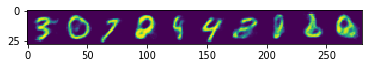

noise  test(number 8)


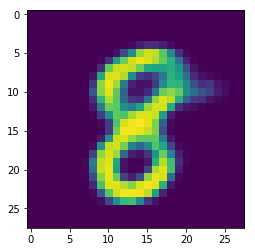

[EPOCH 1 / STEP 7] TRAIN
TRAIN loss   : 107.1858
RECON loss   : 88.9423
KL    loss   : 18.2434
[EPOCH 1 / STEP 7] VAL  
VAL   loss   : 106.6357
RECON loss   : 88.5863
KL    loss   : 18.0494
orig   test


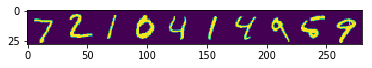

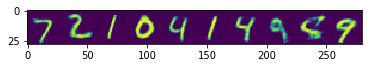

random test


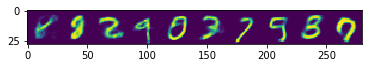

noise  test(number 8)


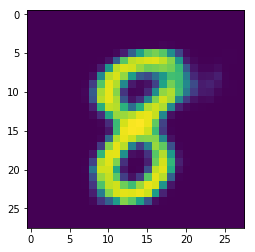

[EPOCH 1 / STEP 8] TRAIN
TRAIN loss   : 106.5627
RECON loss   : 88.1795
KL    loss   : 18.3832
[EPOCH 1 / STEP 8] VAL  
VAL   loss   : 106.1730
RECON loss   : 88.0921
KL    loss   : 18.0810
orig   test


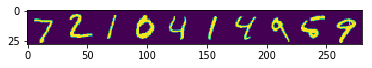

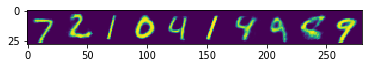

random test


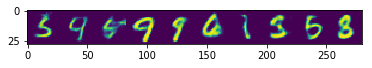

noise  test(number 8)


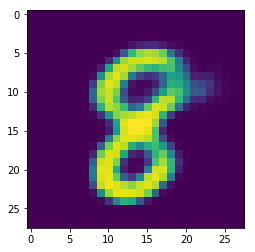

[EPOCH 1 / STEP 9] TRAIN
TRAIN loss   : 105.9097
RECON loss   : 87.4867
KL    loss   : 18.4229
[EPOCH 1 / STEP 9] VAL  
VAL   loss   : 105.5237
RECON loss   : 87.6221
KL    loss   : 17.9015
orig   test


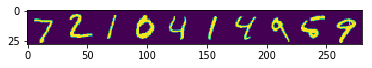

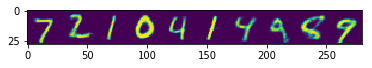

random test


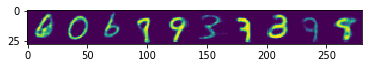

noise  test(number 8)


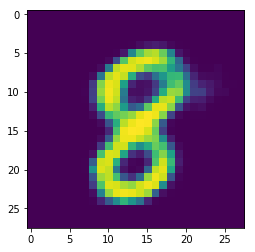

[EPOCH 1 / STEP 10] TRAIN
TRAIN loss   : 105.5190
RECON loss   : 87.0091
KL    loss   : 18.5101
[EPOCH 1 / STEP 10] VAL  
VAL   loss   : 105.7016
RECON loss   : 86.9998
KL    loss   : 18.7018
orig   test


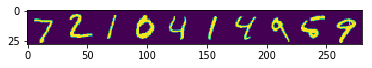

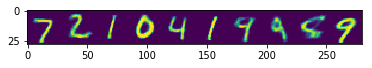

random test


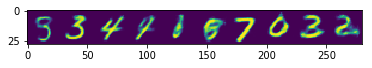

noise  test(number 8)


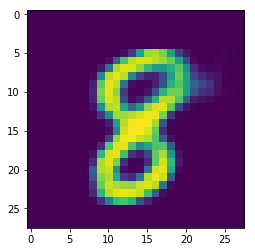

In [16]:
for i in range(10):
    vae.fit(X_train, X_val, 1, 1)
    print("orig   test")
    origtest()
    print("random test")
    randomtest()
    print("noise  test(number 8)")
    noisetest(8)